In [1]:
using Plots

In [205]:
σ=0.3
n=100000
ε = randn(n)*σ
y = zeros(n)

function get_V(α, β)
    return (x)-> α*x + β
end

V = get_V(0.1, 1)


y[1]=ε[1]
for t in 2:n
    y[t] = ε[t]*V(y[t-1])
end

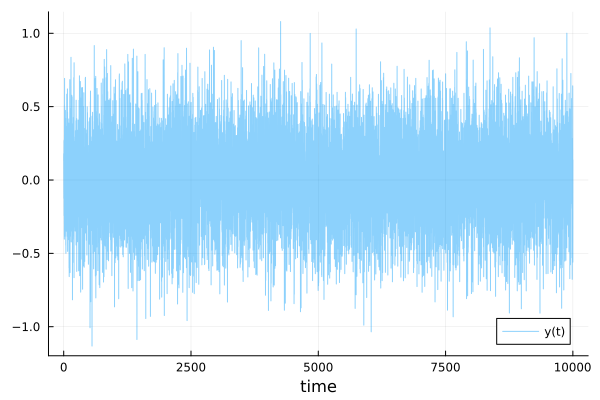

In [206]:
p=plot(y[end-10000:end], label="y(t)", alpha=0.45)
p=plot!(xlabel="time")

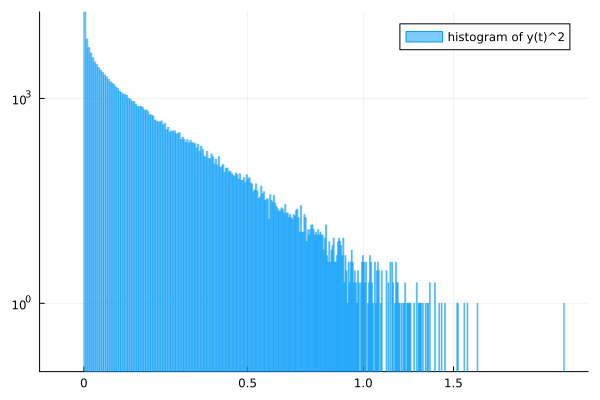

In [207]:
h=histogram(1 .+ y.^2, nbins=500, xaxis=:log, yaxis=:log, linecolor=:match, label="histogram of y(t)^2", alpha=0.5)
plot!(xticks=([1.0, 1.5, 2.0, 2.5],["0", "0.5", "1.0", "1.5"]), legend=:topright)

In [208]:
using StatsBase
f=fit(Histogram, 1 .+ y.^2, nbins=500)


Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  1.0:0.005:3.29
weights: [18527, 7382, 5544, 4603, 3945, 3411, 3119, 2809, 2592, 2398  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
closed: left
isdensity: false

In [209]:
x = log.(collect((f.edges)[1])[2:end])
X = hcat([x ones(size(x))])
y = log.((0.1 .+ f.weights) / n)
β = X[10:end-20, :] \ y[10:end-20,:];

In [210]:
log_y_pred = X*β
y_pred = exp.(log_y_pred)
XX = [log(1.01) 1.0 ; log(2.5) 1.0]
log_yy_pred = XX*β
yy_pred = exp.(log_yy_pred) 

2×1 Matrix{Float64}:
 0.023799340225166506
 2.9256679195122377e-6

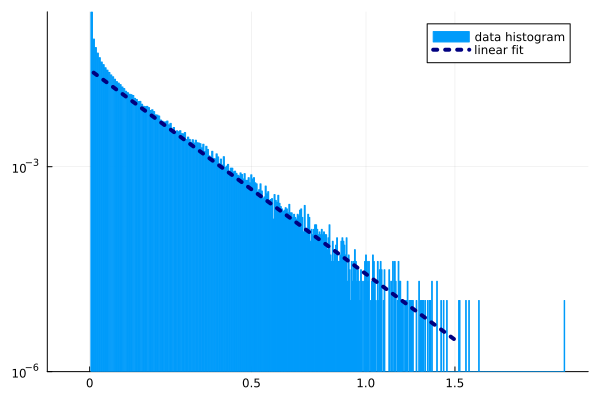

In [211]:
q=bar(exp.(x), exp.(y), xaxis=:log, yaxis=:log, linecolor=:match, label="data histogram")
plot!([1.01; 2.5], yy_pred, lw=4, linestyle=:dot, label="linear fit", color=:navyblue)
#scatter!(exp.(x), y_pred, markerstrokewidth=0, label="linear fit with α=$(β[1]), β=$(β[2])")
plot!(xticks=([1.0, 1.5, 2.0, 2.5],["0", "0.5", "1.0", "1.5"]), legend=:topright)

In [212]:
plot(p,q, size=(1200,300), layout = (1,2), title=["ARCH model through time" "Histogram of values of y(t)^2"])
savefig("../img/arch.png")

"/home/simon/Documents/SimonCoste.github.io/posts/img/arch.png"